In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
import numpy as np
import torch

from p3droslo.loss import Loss

from test_1D             import get_model, get_obs, forward, frequencies, velocities, r_in
from test_1D_CO_and_T import get_initial_model, reconstruct, reconstruct2

/home/frederikd/.local/lib/python3.9/site-packages/astroquery/lamda/core.py:145: UserWarning: The first time a LAMDA function is called, it must assemble a list of valid molecules and URLs.  This list will be cached so future operations will be faster.
  warnings.warn("The first time a LAMDA function is called, it must "


You have selected line:
    CO(J=3-2)
Please check the properties that were inferred:
    Frequency         3.457959899e+11  Hz
    Einstein A coeff  2.497000000e-06  1/s
    Molar mass        28.0101          g/mol


In [2]:
test_model_name = 'models/test_model_1D.h5'
spherical_model = get_model()
spherical_model.model_1D.save(test_model_name)

In [3]:
obs = get_obs()

In [4]:
nCO_init = 30
tmp_init = 1.0e+3
spherical = get_initial_model(
    from_model = test_model_name,
    nCO        = nCO_init,
    tmp        = tmp_init
)

Text(0.5, 0, 'frequency [km/s]')

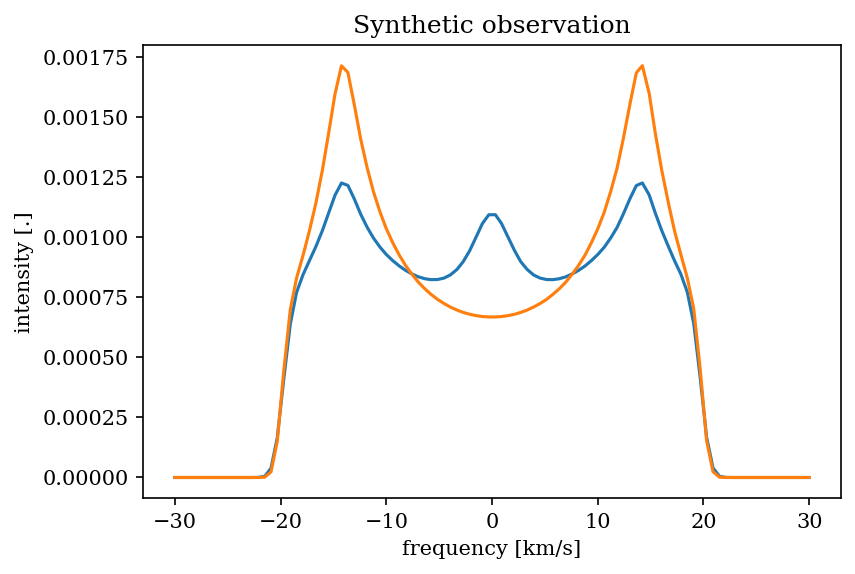

In [5]:
plt.figure(dpi=150)
plt.title("Synthetic observation")
plt.plot(velocities/1.0e+3, obs.data)
plt.plot(velocities/1.0e+3, forward(spherical).data)
plt.ylabel(r"intensity [.]")
plt.xlabel(r"frequency [km/s]")

In [6]:
img, loss = reconstruct2(spherical, obs)

  0%|          | 0/3 [00:00<?, ?it/s]/home/frederikd/.local/lib/python3.9/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 550/550 [07:37<00:00,  1.20it/s]


In [7]:
# img, loss = reconstruct(spherical, obs)

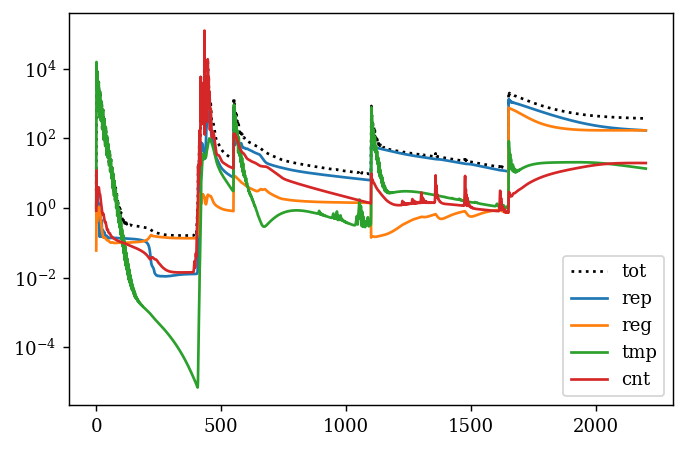

In [8]:
loss.plot()

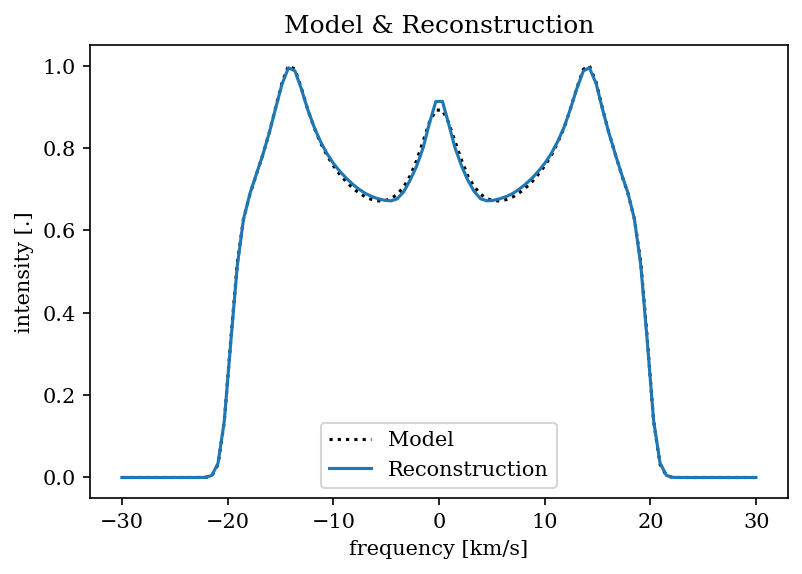

In [9]:
plt.figure(dpi=150)
plt.title("Model & Reconstruction")
plt.plot(velocities/1.0e+3, obs.data/obs.data.max(), c='k', linestyle=':', label='Model')
plt.plot(velocities/1.0e+3, img.data/obs.data.max(),                       label='Reconstruction')
plt.ylabel(r"intensity [.]")
plt.xlabel(r"frequency [km/s]")
plt.legend()

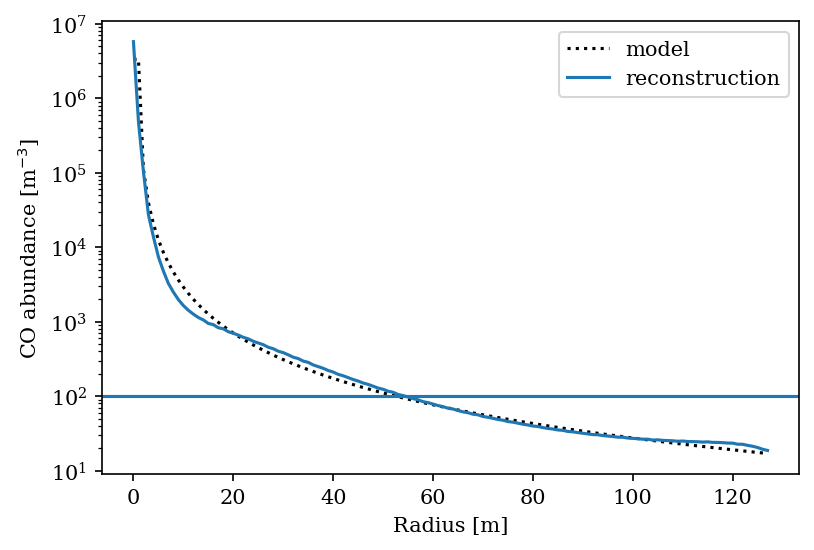

In [10]:
plt.figure(dpi=150)
plt.plot(torch.exp(spherical_model.model_1D['log_CO']).data, c='k', linestyle=':', label='model')
plt.axhline(100)
plt.plot(torch.exp(spherical.model_1D['log_CO']).data, label='reconstruction')
plt.yscale('log')
plt.ylabel('CO abundance [m$^{-3}$]')
plt.xlabel('Radius [m]')
plt.legend()

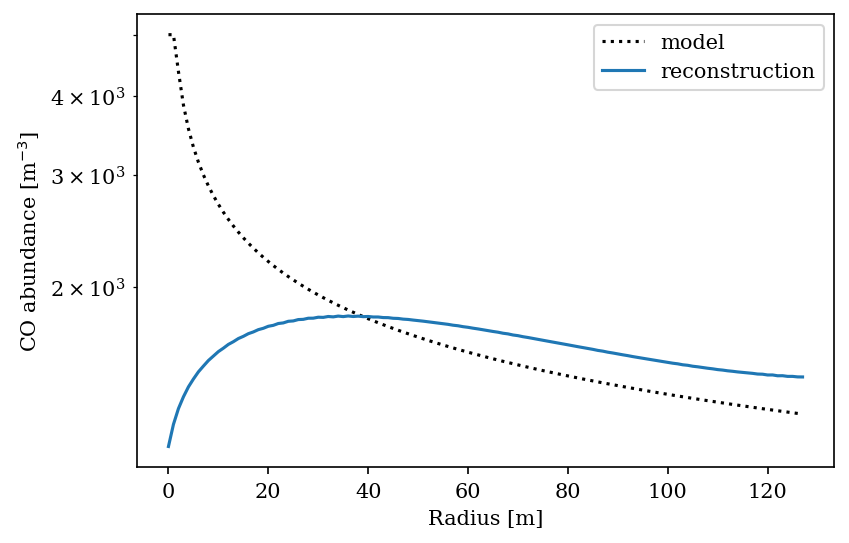

In [11]:
plt.figure(dpi=150)
plt.plot(torch.exp(spherical_model.model_1D['log_temperature']).data, c='k', linestyle=':', label='model')
plt.plot(torch.exp(spherical.model_1D['log_temperature']).data, label='reconstruction')
plt.yscale('log')
plt.ylabel('CO abundance [m$^{-3}$]')
plt.xlabel('Radius [m]')
plt.legend()

In [12]:
spherical.model_1D.save('models/test_model_1D_rec_CO_30_tmp_1000_2.h5')

In [13]:
from test_1D_CO_and_T import steady_state_heat_loss, steady_state_cont_loss

In [16]:
r = spherical.model_1D.get_coords(origin=np.array([-2]))
r[r<r_in] = r_in

In [17]:
steady_state_heat_loss(spherical_model, torch.from_numpy(r))

tensor(3.5159e-30, dtype=torch.float64)

In [18]:
steady_state_cont_loss(spherical_model, torch.from_numpy(r))

tensor(3.6200e-21, dtype=torch.float64)

In [19]:
steady_state_heat_loss(spherical, torch.from_numpy(r))

tensor(9.7037e-35, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [20]:
steady_state_cont_loss(spherical, torch.from_numpy(r))

tensor(3.2651e-21, dtype=torch.float64, grad_fn=<MeanBackward0>)